In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [1]:
import torch
print(torch.version.cuda)
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

11.8
2.0.1+cu118
True
Tesla T4


In [ ]:
!nvidia-smi

Tue Dec 13 13:56:39 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.65       Driver Version: 527.56       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0  On |                  N/A |
|  0%   34C    P8    15W / 170W |   2031MiB / 12288MiB |      6%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import cudf, requests
from io import StringIO

url = "https://github.com/plotly/datasets/raw/master/tips.csv"
content = requests.get(url).content.decode('utf-8')

tips_df = cudf.read_csv(StringIO(content))
tips_df['tip_percentage'] = tips_df['tip'] / tips_df['total_bill'] * 100

# display average tip by dining party size
print(tips_df.groupby('size').tip_percentage.mean())

size
6    15.622920
1    21.729202
4    14.594901
3    15.215685
2    16.571919
5    14.149549
Name: tip_percentage, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# XGBoost API example
params = {'tree_method': 'gpu_hist', 'max_depth': 3, 'learning_rate': 0.1}
dtrain = xgb.DMatrix(data, target)
xgb.train(params, dtrain, evals=[(dtrain, "train")])

# sklearn API example
gbm = XGBRegressor(silent=False, n_estimators=10, tree_method='gpu_hist')
gbm.fit(data, target, eval_set=[(data, target)])

[0]	train-rmse:21.60208
[1]	train-rmse:19.55555
[2]	train-rmse:17.71453
[3]	train-rmse:16.06071
[4]	train-rmse:14.57054
[5]	train-rmse:13.23501
[6]	train-rmse:12.03721
[7]	train-rmse:10.94917
[8]	train-rmse:9.98378
[9]	train-rmse:9.10604
[13:56:45] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation_0-rmse:17.06433
[1]	validation_0-rmse:12.27140
[2]	validation_0-rmse:8.92523
[3]	validation_0-rmse:6.56554
[4]	validation_0-rmse:4.88678
[5]	validation_0-rmse:3.70939
[6]	validation_0-rmse:2.89225
[7]	validation_0-rmse:2.33943
[8]	validation_0-rmse:1.94412
[9]	validation_0-rmse:1.66867


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=0,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
    datase

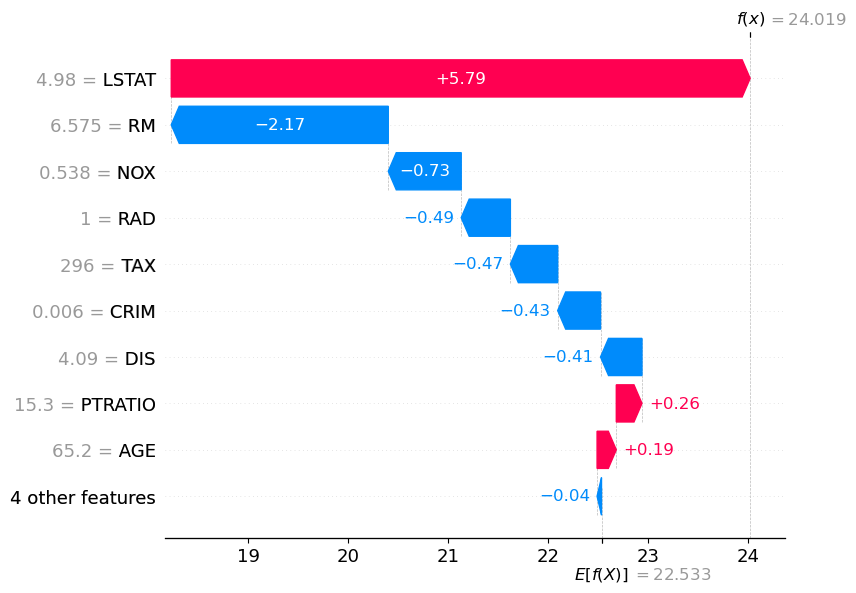

In [ ]:
import xgboost
import shap

# train an XGBoost model
X, y = shap.datasets.boston()
model = xgboost.XGBRegressor(tree_method='gpu_hist').fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])